# Структура данных DataFrame

**Импорт библиотек**

In [1]:
import polars as pl
import pandas as pd
import numpy as np

Объект `DataFrame` представляет структуру, состоящая из объектов `Series`. Объект `DataFrame` – это полноценная таблица с множеством строк и столбцов.

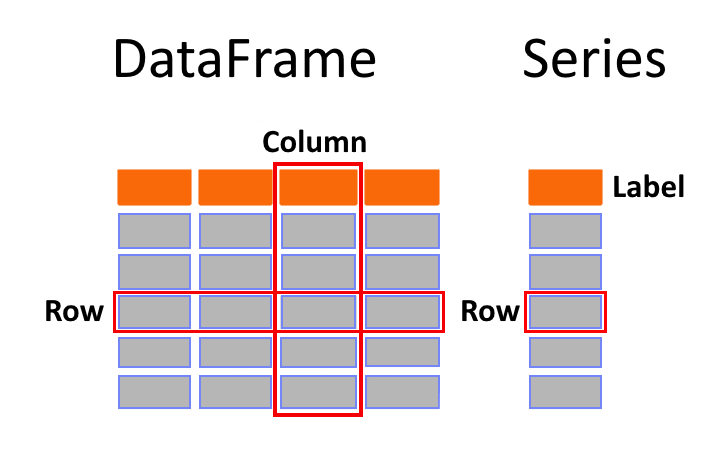

Объекты `Series` и `DataFrame` схожи, и многие операции, которые можно выполнять с одним из них, можно выполнять и с другим.

## Создание DataFrame

Для создания датафрейма используют конструктор класса `DataFrame`, который выглядит следующим образом:

`polars.DataFrame(data=None,schema=None,schema_override=None,strict=True,orient=None,infer_schema_length=100,nan_to_null=False)`

| Параметр                | Тип / Возможные значения                         | Описание                                     |
|-------------------------|--------------------------------------------------|----------------------------------------------|
| **data**                | `Iterable`, `dict`, `DataFrame`, `numpy.ndarray`, `pandas.DataFrame` или `None` | Данные, на которых будет строиться DataFrame                                                                                                                   |
| **schema**              | `Sequence[str]` или `Dict[str, Type]`            | Задаёт структуру выходного DataFrame: имена столбцов и (опционально) их типы. Пример: `{"name": str, "age": int}`.                                                                               |
| **schema_override**     | `Dict[str, Type]` или `List[Type]`               | Используется при чтении несовместных источников (например, numpy-массивов), чтобы переопределить автоматически определённые типы данных.                                                     |
| **strict**              | `bool`                                           | Если `True`, возникает ошибка при невозможности преобразования данных. При `False` Polars пытается выполнить мягкое преобразование (например, обрезка строк, округление чисел).                    |
| **orient**              | `{'col', 'row'}` или `None`                      | Указывает ориентацию входных данных. `'row'` — данные представлены как список строк, `'col'` — как список столбцов. Автоматически определяется, если не указано.                                   |
| **infer_schema_length** | `int` или `None`                                 | Количество строк, используемых для определения типов данных, если `schema` не задан. По умолчанию 100. Если `None` — анализируются все строки (создание DataFrame заёмет больше времени).     |
| **nan_to_null**         | `bool`                                           | Если `True`, преобразует значения `NaN` в нуллы Polars (`null`/`None`). Полезно при работе с данными из Pandas.                                                                    |

### Примеры создания *DataFrame*

Создать DataFrame можно разными способами:
- из словаря;
- из списка словарей;
- из списка списков;
- из структур Series;
- из массива NumPy;
- из другого датафрейма.

**Из словаря**

In [2]:
# Создадим словарь
dict_data = {
    "имя": ["Алексей", "Мария", "Иван"],
    "возраст": [25, 30, 22],
    "город": ["Москва", "Санкт-Петербург", "Казань"]
}

# Создание pl.DataFrame из словаря
df = pl.DataFrame(data=dict_data)

# Вывод DataFrame
print(df)

shape: (3, 3)
┌─────────┬─────────┬─────────────────┐
│ имя     ┆ возраст ┆ город           │
│ ---     ┆ ---     ┆ ---             │
│ str     ┆ i64     ┆ str             │
╞═════════╪═════════╪═════════════════╡
│ Алексей ┆ 25      ┆ Москва          │
│ Мария   ┆ 30      ┆ Санкт-Петербург │
│ Иван    ┆ 22      ┆ Казань          │
└─────────┴─────────┴─────────────────┘


1. В **Jupyter Notebook** так же можно вывести при помощи функции display() или просто по наименованию DataFrame.
2. Обращаю внимание, что сразу после наименования заголовков колонок выводится тип данных, который *polars* определил сам.
3. Над таблицей выводится размерность нашего DataFrame.

In [3]:
display(df)

имя,возраст,город
str,i64,str
"""Алексей""",25,"""Москва"""
"""Мария""",30,"""Санкт-Петербург"""
"""Иван""",22,"""Казань"""


**Из списка словарей**

In [4]:
# Создадим список словарей
dataList = [
    {"имя": "Алексей", "возраст": 25, "город": "Москва"},
    {"имя": "Мария", "возраст": 30, "город": "Санкт-Петербург"},
    {"имя": "Иван", "возраст": 22, "город": "Казань"}
]

# Создание DataFrame из списка словарей
df = pl.DataFrame(data=dataList)

# Вывод DataFrame
display(df)

имя,возраст,город
str,i64,str
"""Алексей""",25,"""Москва"""
"""Мария""",30,"""Санкт-Петербург"""
"""Иван""",22,"""Казань"""


**Из списка списков**

Тут появляются некоторые особенности

In [5]:
# Создадим список списков
dataListList = [
    ["Алексей", 25, "Москва"],
    ["Мария", 30, "Санкт-Петербург"],
    ["Иван", 22, "Казань"]
]

try:
    # Создание DataFrame из списка списков
    df = pl.DataFrame(data=dataListList)
    # Вывод DataFrame
    print(df)
except Exception as e:
    print(f"Ошибка {e}")


Ошибка unexpected value while building Series of type String; found value of type Int64: 25

Hint: Try setting `strict=False` to allow passing data with mixed types.


*Polars* по умолчанию пытается создать каждый столбец с одним типом данных. При этом он сначала смотрит на первую строку, чтобы определить типы. Видим, что первый элемент первой строки — строка ("Алексей"), и предполагает, что весь первый столбец должен быть `String`. Но второй элемент первой строки — число 25, и `Polars` в замешательстве: типы данных строка и числовой несовместимы, и не может их вставить → отсюда ошибка. Т.е. он думает, что каждая строка списка - это отдельная колонка. Чтобы избавиться от ошибки, есть два варианта:
- задать параметр `orient`
- задать параметр `schema` (может не помочь!)

In [6]:
# Создадим список списков
dataListList = [
    ["Алексей", 25, "Москва"],
    ["Мария", 30, "Санкт-Петербург"],
    ["Иван", 22, "Казань"]
]

try:
    # Создание DataFrame из списка списков
    df = pl.DataFrame(data=dataListList, orient="row")
    # Вывод DataFrame
    print(df)
except Exception as e:
    print(f"Ошибка {e}")

shape: (3, 3)
┌──────────┬──────────┬─────────────────┐
│ column_0 ┆ column_1 ┆ column_2        │
│ ---      ┆ ---      ┆ ---             │
│ str      ┆ i64      ┆ str             │
╞══════════╪══════════╪═════════════════╡
│ Алексей  ┆ 25       ┆ Москва          │
│ Мария    ┆ 30       ┆ Санкт-Петербург │
│ Иван     ┆ 22       ┆ Казань          │
└──────────┴──────────┴─────────────────┘


Теперь всё работает. Однако мы получили *DataFrame* с автоматической индексацией колонок. Заново создадим объект и передадим список с именами колонок параметру `schema`:

In [7]:
# Создадим список списков
dataListList = [
    ["Алексей", 25, "Москва"],
    ["Мария", 30, "Санкт-Петербург"],
    ["Иван", 22, "Казань"]
]

# Определение имен столбцов
columns_name = ["имя", "возраст", "город"]

try:
    # Создание DataFrame из списка списков
    df = pl.DataFrame(data=dataListList, schema=columns_name, orient="row")
    # Вывод DataFrame
    print(df)
except Exception as e:
    print(f"Ошибка {e}")

shape: (3, 3)
┌─────────┬─────────┬─────────────────┐
│ имя     ┆ возраст ┆ город           │
│ ---     ┆ ---     ┆ ---             │
│ str     ┆ i64     ┆ str             │
╞═════════╪═════════╪═════════════════╡
│ Алексей ┆ 25      ┆ Москва          │
│ Мария   ┆ 30      ┆ Санкт-Петербург │
│ Иван    ┆ 22      ┆ Казань          │
└─────────┴─────────┴─────────────────┘


Готово

**Из структур Series**

In [8]:
# Создадим Series
name_series = pl.Series(name="имя", values=["Алексей", "Мария", "Иван"])
age_series = pl.Series(name="возраст", values=[25, 30, 22])
city_series = pl.Series(name="город", values=["Москва", "Санкт-Петербург", "Казань"])

# Создание DataFrame из Series
df = pl.DataFrame([name_series, age_series, city_series])

# Вывод DataFrame
print(df)

shape: (3, 3)
┌─────────┬─────────┬─────────────────┐
│ имя     ┆ возраст ┆ город           │
│ ---     ┆ ---     ┆ ---             │
│ str     ┆ i64     ┆ str             │
╞═════════╪═════════╪═════════════════╡
│ Алексей ┆ 25      ┆ Москва          │
│ Мария   ┆ 30      ┆ Санкт-Петербург │
│ Иван    ┆ 22      ┆ Казань          │
└─────────┴─────────┴─────────────────┘


Для одиночной *Series* есть метод `to_frame()`, который позволяет сконвертировать объект Series в объект DataFrame:

In [9]:
# Создаем серию
s = pl.Series(name="имя", values=["Алексей", "Мария", "Иван"])
# Конвертируем в DataFrame
df = s.to_frame()
# Получаем
df

имя
str
"""Алексей"""
"""Мария"""
"""Иван"""


**Из массива NumPy**

In [10]:
# Создаём массив NumPy
data_array = np.array([
    ["Алексей", 25, "Москва"],
    ["Мария", 30, "Санкт-Петербург"],
    ["Иван", 22, "Казань"]
])

# DataFrame из массива NumPy
df = pl.DataFrame(data_array)

# Вывод DataFrame
print(df)

shape: (3, 3)
┌──────────┬──────────┬─────────────────┐
│ column_0 ┆ column_1 ┆ column_2        │
│ ---      ┆ ---      ┆ ---             │
│ str      ┆ str      ┆ str             │
╞══════════╪══════════╪═════════════════╡
│ Алексей  ┆ 25       ┆ Москва          │
│ Мария    ┆ 30       ┆ Санкт-Петербург │
│ Иван     ┆ 22       ┆ Казань          │
└──────────┴──────────┴─────────────────┘


## Получение сведений о `DataFrame`

Создадим *DataFrame* с медведями

In [11]:
# Все виды современных медведей
data_bears = {
    "Вид": [
        "Белый медведь",
        "Бурый медведь",
        "Чёрный медведь",
        "Гималайский медведь",
        "Малая панда",
        "Большая панда",
        "Малайский медведь",
        "Очковый медведь"
    ],
    "Латинское_название": [
        "Ursus maritimus",
        "Ursus arctos",
        "Ursus americanus",
        "Ursus thibetanus",
        "Ailurus fulgens",
        "Ailuropoda melanoleuca",
        "Helarctos malayanus",
        "Tremarctos ornatus"
    ],
    "Масса_min_кг": [300, 90, 60, 60, 3, 70, 25, 50],
    "Масса_max_кг": [800, 600, 300, 200, 6, 150, 65, 150],
    "Рост_min_м": [1.5, 1.3, 1.0, 1.0, 0.4, 1.0, 1.0, 1.0],
    "Рост_max_м": [1.8, 2.8, 2.0, 1.5, 0.6, 1.5, 1.5, 1.8],
    "Ареал_обитания": [
        "Арктика (Канада, Гренландия, Россия и др.)",
        "Евразия, Северная Америка",
        "Северная Америка",
        "Южная и Юго-Восточная Азия",
        "Гималаи, Непал, Бутан",
        "Центра́льный и Западный Китай",
        "Юго-Восточная Азия",
        "Анды, Южная Америка"
    ],
    "Статус_охр": [
        "Уязвимый (IUCN)",
        "Безопасный (IUCN)",
        "Безопасный (IUCN)",
        "Уязвимый (IUCN)",
        "Уязвимый (IUCN)",
        "Уязвимый (IUCN)",
        "Уязвимый (IUCN)",
        "Вызывающий опасение (IUCN)"
    ]
}

# Создание DataFrame
df_bears = pl.DataFrame(data_bears)

# Вывод первых строк
print(df_bears)

shape: (8, 8)
┌────────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│ Вид        ┆ Латинское_ ┆ Масса_min_ ┆ Масса_max ┆ Рост_min_ ┆ Рост_max_ ┆ Ареал_оби ┆ Статус_ох │
│ ---        ┆ название   ┆ кг         ┆ _кг       ┆ м         ┆ м         ┆ тания     ┆ р         │
│ str        ┆ ---        ┆ ---        ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│            ┆ str        ┆ i64        ┆ i64       ┆ f64       ┆ f64       ┆ str       ┆ str       │
╞════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Белый      ┆ Ursus      ┆ 300        ┆ 800       ┆ 1.5       ┆ 1.8       ┆ Арктика   ┆ Уязвимый  │
│ медведь    ┆ maritimus  ┆            ┆           ┆           ┆           ┆ (Канада,  ┆ (IUCN)    │
│            ┆            ┆            ┆           ┆           ┆           ┆ Гренланди ┆           │
│            ┆            ┆            ┆           ┆           ┆           ┆ 

**Методы `head()`, `tail()`**

Метод `head()` позволяет вывести первые **m** строк *DataFrame*. По умолчанию метод выводит первые пять строк.

In [12]:
df_bears.head()

Вид,Латинское_название,Масса_min_кг,Масса_max_кг,Рост_min_м,Рост_max_м,Ареал_обитания,Статус_охр
str,str,i64,i64,f64,f64,str,str
"""Белый медведь""","""Ursus maritimus""",300,800,1.5,1.8,"""Арктика (Канада, Гренландия, Р…","""Уязвимый (IUCN)"""
"""Бурый медведь""","""Ursus arctos""",90,600,1.3,2.8,"""Евразия, Северная Америка""","""Безопасный (IUCN)"""
"""Чёрный медведь""","""Ursus americanus""",60,300,1.0,2.0,"""Северная Америка""","""Безопасный (IUCN)"""
"""Гималайский медведь""","""Ursus thibetanus""",60,200,1.0,1.5,"""Южная и Юго-Восточная Азия""","""Уязвимый (IUCN)"""
"""Малая панда""","""Ailurus fulgens""",3,6,0.4,0.6,"""Гималаи, Непал, Бутан""","""Уязвимый (IUCN)"""


In [13]:
print(df_bears.head(2))

shape: (2, 8)
┌────────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│ Вид        ┆ Латинское_ ┆ Масса_min_ ┆ Масса_max ┆ Рост_min_ ┆ Рост_max_ ┆ Ареал_оби ┆ Статус_ох │
│ ---        ┆ название   ┆ кг         ┆ _кг       ┆ м         ┆ м         ┆ тания     ┆ р         │
│ str        ┆ ---        ┆ ---        ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│            ┆ str        ┆ i64        ┆ i64       ┆ f64       ┆ f64       ┆ str       ┆ str       │
╞════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Белый      ┆ Ursus      ┆ 300        ┆ 800       ┆ 1.5       ┆ 1.8       ┆ Арктика   ┆ Уязвимый  │
│ медведь    ┆ maritimus  ┆            ┆           ┆           ┆           ┆ (Канада,  ┆ (IUCN)    │
│            ┆            ┆            ┆           ┆           ┆           ┆ Гренланди ┆           │
│            ┆            ┆            ┆           ┆           ┆           ┆ 

Метод `tail()` позволяет вывести последние **m** строк *DataFrame*. По умолчанию метод выводит последние пять строк.

In [14]:
df_bears.tail()

Вид,Латинское_название,Масса_min_кг,Масса_max_кг,Рост_min_м,Рост_max_м,Ареал_обитания,Статус_охр
str,str,i64,i64,f64,f64,str,str
"""Гималайский медведь""","""Ursus thibetanus""",60,200,1.0,1.5,"""Южная и Юго-Восточная Азия""","""Уязвимый (IUCN)"""
"""Малая панда""","""Ailurus fulgens""",3,6,0.4,0.6,"""Гималаи, Непал, Бутан""","""Уязвимый (IUCN)"""
"""Большая панда""","""Ailuropoda melanoleuca""",70,150,1.0,1.5,"""Центра́льный и Западный Китай""","""Уязвимый (IUCN)"""
"""Малайский медведь""","""Helarctos malayanus""",25,65,1.0,1.5,"""Юго-Восточная Азия""","""Уязвимый (IUCN)"""
"""Очковый медведь""","""Tremarctos ornatus""",50,150,1.0,1.8,"""Анды, Южная Америка""","""Вызывающий опасение (IUCN)"""


**Атрибут `shape`**

Атрибут `shape` возвращает кортеж, содержащий количество строк и столбцов в объекте *DataFrame*

In [15]:
df_bears.shape # (количество_строк, количество_столбцов)

(8, 8)

**Атрибут `dtypes`**

Атрибут `dtypes` возвращает типы данных столбцов датафрейма.

In [16]:
df_bears.dtypes

[String, String, Int64, Int64, Float64, Float64, String, String]

**Атрибут `columns`**

Чтобы получить имена столбцов используют атрибут `columns`.

In [17]:
df_bears.columns

['Вид',
 'Латинское_название',
 'Масса_min_кг',
 'Масса_max_кг',
 'Рост_min_м',
 'Рост_max_м',
 'Ареал_обитания',
 'Статус_охр']

**Методы `to_numpy()`, `to_pandas()`**

Чтобы получить значения *DataFrame* в виде массива, можно использовать метод `to_numpy()`

In [18]:
df_bears.to_numpy()

array([['Белый медведь', 'Ursus maritimus', 300, 800, 1.5, 1.8,
        'Арктика (Канада, Гренландия, Россия и др.)', 'Уязвимый (IUCN)'],
       ['Бурый медведь', 'Ursus arctos', 90, 600, 1.3, 2.8,
        'Евразия, Северная Америка', 'Безопасный (IUCN)'],
       ['Чёрный медведь', 'Ursus americanus', 60, 300, 1.0, 2.0,
        'Северная Америка', 'Безопасный (IUCN)'],
       ['Гималайский медведь', 'Ursus thibetanus', 60, 200, 1.0, 1.5,
        'Южная и Юго-Восточная Азия', 'Уязвимый (IUCN)'],
       ['Малая панда', 'Ailurus fulgens', 3, 6, 0.4, 0.6,
        'Гималаи, Непал, Бутан', 'Уязвимый (IUCN)'],
       ['Большая панда', 'Ailuropoda melanoleuca', 70, 150, 1.0, 1.5,
        'Центра́льный и Западный Китай', 'Уязвимый (IUCN)'],
       ['Малайский медведь', 'Helarctos malayanus', 25, 65, 1.0, 1.5,
        'Юго-Восточная Азия', 'Уязвимый (IUCN)'],
       ['Очковый медведь', 'Tremarctos ornatus', 50, 150, 1.0, 1.8,
        'Анды, Южная Америка', 'Вызывающий опасение (IUCN)']],
      d

Методом `to_pandas()` можно текущий датафрейм конвертировать в pandas *DataFrame*

In [19]:
df_bears.to_pandas()

,Вид,Латинское_название,Масса_min_кг,Масса_max_кг,Рост_min_м,Рост_max_м,Ареал_обитания,Статус_охр
0,Белый медведь,Ursus maritimus,300,800,1.5,1.8,"Арктика (Канада, Гренландия, Россия и др.)",Уязвимый (IUCN)
1,Бурый медведь,Ursus arctos,90,600,1.3,2.8,"Евразия, Северная Америка",Безопасный (IUCN)
2,Чёрный медведь,Ursus americanus,60,300,1.0,2.0,Северная Америка,Безопасный (IUCN)
3,Гималайский медведь,Ursus thibetanus,60,200,1.0,1.5,Южная и Юго-Восточная Азия,Уязвимый (IUCN)
4,Малая панда,Ailurus fulgens,3,6,0.4,0.6,"Гималаи, Непал, Бутан",Уязвимый (IUCN)
5,Большая панда,Ailuropoda melanoleuca,70,150,1.0,1.5,Центра́льный и Западный Китай,Уязвимый (IUCN)
6,Малайский медведь,Helarctos malayanus,25,65,1.0,1.5,Юго-Восточная Азия,Уязвимый (IUCN)
7,Очковый медведь,Tremarctos ornatus,50,150,1.0,1.8,"Анды, Южная Америка",Вызывающий опасение (IUCN)


Доброе напоминание получение информации из pandas *DataFrame*:
- Методы head() и tail()
- Метод info()
- Атрибут dtypes
- Атрибут shape
- Атрибут size
- Атрибуты index, columns и values

## Добавление нового столбца/столбцов в `DataFrame`

Основные методы добавления столбцов в *DataFrame*:
- `with_columns()`: Основной способ добавления одного или нескольких столбцов.
- `lit()`: Добавление константы.
- `when().then().otherwise()`: Добавления столбца по условию.
- `hstack()`: Добавление одного или нескольких столбцов в конец.
- `select()`: Пересоздание DataFrame с новыми столбцами.

Методом `with_columns()`можно добавить один или нескольких новых столбцов к *DataFrame*.

In [20]:
# Исходный DataFrame
df = pl.DataFrame({
    "Имя": ["Алексей", "Мария", "Иван"],
    "Возраст": [25, 30, 22]
})

# Создаем новую серию
col_town = pl.Series(name="Город", values=["Москва", "СПб", "Казань"])

# Добавляем серию как новый столбец
df = df.with_columns(col_town)

# Вывод
print(df)

shape: (3, 3)
┌─────────┬─────────┬────────┐
│ Имя     ┆ Возраст ┆ Город  │
│ ---     ┆ ---     ┆ ---    │
│ str     ┆ i64     ┆ str    │
╞═════════╪═════════╪════════╡
│ Алексей ┆ 25      ┆ Москва │
│ Мария   ┆ 30      ┆ СПб    │
│ Иван    ┆ 22      ┆ Казань │
└─────────┴─────────┴────────┘


Как видим, столбец добавился в самый конец таблицы. Если мы хотим поменять колонки местами, то необходимо воспользоваться методом `select()`

In [21]:
# Меняем местами колонки "Возраст" и "Город"
df = df.select(["Имя", "Город", "Возраст"])

print(df)

shape: (3, 3)
┌─────────┬────────┬─────────┐
│ Имя     ┆ Город  ┆ Возраст │
│ ---     ┆ ---    ┆ ---     │
│ str     ┆ str    ┆ i64     │
╞═════════╪════════╪═════════╡
│ Алексей ┆ Москва ┆ 25      │
│ Мария   ┆ СПб    ┆ 30      │
│ Иван    ┆ Казань ┆ 22      │
└─────────┴────────┴─────────┘


**Добавление столбца на основе условий `when().then().otherwise()`**

In [22]:
df = df.with_columns(pl.when(pl.col("Возраст") > 25).then(pl.lit("взрослый")).otherwise(pl.lit("молодой")).alias("Категория"))

print(df)

shape: (3, 4)
┌─────────┬────────┬─────────┬───────────┐
│ Имя     ┆ Город  ┆ Возраст ┆ Категория │
│ ---     ┆ ---    ┆ ---     ┆ ---       │
│ str     ┆ str    ┆ i64     ┆ str       │
╞═════════╪════════╪═════════╪═══════════╡
│ Алексей ┆ Москва ┆ 25      ┆ молодой   │
│ Мария   ┆ СПб    ┆ 30      ┆ взрослый  │
│ Иван    ┆ Казань ┆ 22      ┆ молодой   │
└─────────┴────────┴─────────┴───────────┘


Разберём код:
1. `.with_columns(...)` - метод, который добавлет новый столбец;
2. `pl.when(...).then(...).otherwise(...)` - `pl.when(...)` задаёт условие , которое будет проверяться построчно. Если условие истинно, то отрабатывает блок `then(...)`, иначе `otherwise(...)`;
3. `pl.col(...)` - метод, который обращается к конкретному столбцу;
4. `pl.lit(...)` - метод, который вставляет константу;
5.  `.alias(...)` - присваиваем имя новому стобцу.

**Метод `hstack()`**

In [23]:
# Создадим Series - наш новый стобец скоро
salary = pl.Series(name="Зарплата", values=[70000, 90000, 50000])

# Добавляем новый столбец
df = df.hstack([salary])

print(df)

shape: (3, 5)
┌─────────┬────────┬─────────┬───────────┬──────────┐
│ Имя     ┆ Город  ┆ Возраст ┆ Категория ┆ Зарплата │
│ ---     ┆ ---    ┆ ---     ┆ ---       ┆ ---      │
│ str     ┆ str    ┆ i64     ┆ str       ┆ i64      │
╞═════════╪════════╪═════════╪═══════════╪══════════╡
│ Алексей ┆ Москва ┆ 25      ┆ молодой   ┆ 70000    │
│ Мария   ┆ СПб    ┆ 30      ┆ взрослый  ┆ 90000    │
│ Иван    ┆ Казань ┆ 22      ┆ молодой   ┆ 50000    │
└─────────┴────────┴─────────┴───────────┴──────────┘


В метод `hstack()` надо передавать список. Ещё данный метод содержит в себе параметр `in_place`, который может сразу же изменить исходный *DataFrame*

In [24]:
# Создадим Series - наш новый стобец скоро
transport = pl.Series(name="Транспорт", values=["Скутер", "Велосипед", "Автомобиль"])

# Добавляем новый столбец
df.hstack(columns=[transport], in_place=True)

print(df)

shape: (3, 6)
┌─────────┬────────┬─────────┬───────────┬──────────┬────────────┐
│ Имя     ┆ Город  ┆ Возраст ┆ Категория ┆ Зарплата ┆ Транспорт  │
│ ---     ┆ ---    ┆ ---     ┆ ---       ┆ ---      ┆ ---        │
│ str     ┆ str    ┆ i64     ┆ str       ┆ i64      ┆ str        │
╞═════════╪════════╪═════════╪═══════════╪══════════╪════════════╡
│ Алексей ┆ Москва ┆ 25      ┆ молодой   ┆ 70000    ┆ Скутер     │
│ Мария   ┆ СПб    ┆ 30      ┆ взрослый  ┆ 90000    ┆ Велосипед  │
│ Иван    ┆ Казань ┆ 22      ┆ молодой   ┆ 50000    ┆ Автомобиль │
└─────────┴────────┴─────────┴───────────┴──────────┴────────────┘


## Переименование столбцов и транспонирование

### **Переименование столбцов**

Основные способы переименовать столбцы в *DataFrame*:
1. Метод `rename()`
2. Метод `select()`

Посмотрим наш *DataFrame*

In [25]:
print(df)

shape: (3, 6)
┌─────────┬────────┬─────────┬───────────┬──────────┬────────────┐
│ Имя     ┆ Город  ┆ Возраст ┆ Категория ┆ Зарплата ┆ Транспорт  │
│ ---     ┆ ---    ┆ ---     ┆ ---       ┆ ---      ┆ ---        │
│ str     ┆ str    ┆ i64     ┆ str       ┆ i64      ┆ str        │
╞═════════╪════════╪═════════╪═══════════╪══════════╪════════════╡
│ Алексей ┆ Москва ┆ 25      ┆ молодой   ┆ 70000    ┆ Скутер     │
│ Мария   ┆ СПб    ┆ 30      ┆ взрослый  ┆ 90000    ┆ Велосипед  │
│ Иван    ┆ Казань ┆ 22      ┆ молодой   ┆ 50000    ┆ Автомобиль │
└─────────┴────────┴─────────┴───────────┴──────────┴────────────┘


**Метод `rename()`**

В метод `rename()` необходимо передать словарь, где ключами являются столбцы с текущими наименованиями, а значения - на что меняем.

In [26]:
# Пишем словарь типа Старое имя - Новое имя
dict_new_name = {
    "Имя": "name",
    "Город": "town",
    "Возраст": "age",
    "Категория":"category",
    "Зарплата":"salary",
    "Транспорт":"transport"
}
    
df_new_name_column = df.rename(dict_new_name)

print(df_new_name_column)

shape: (3, 6)
┌─────────┬────────┬─────┬──────────┬────────┬────────────┐
│ name    ┆ town   ┆ age ┆ category ┆ salary ┆ transport  │
│ ---     ┆ ---    ┆ --- ┆ ---      ┆ ---    ┆ ---        │
│ str     ┆ str    ┆ i64 ┆ str      ┆ i64    ┆ str        │
╞═════════╪════════╪═════╪══════════╪════════╪════════════╡
│ Алексей ┆ Москва ┆ 25  ┆ молодой  ┆ 70000  ┆ Скутер     │
│ Мария   ┆ СПб    ┆ 30  ┆ взрослый ┆ 90000  ┆ Велосипед  │
│ Иван    ┆ Казань ┆ 22  ┆ молодой  ┆ 50000  ┆ Автомобиль │
└─────────┴────────┴─────┴──────────┴────────┴────────────┘


Важно: если в метод `rename()` передать несуществующие наименование колонок, код упадет с ошибкой. Пример:

In [27]:
# Пишем словарь типа Старое имя - Новое имя
dict_new_name = {
    "Имя": "name",
    "Город": "town",
    "Возраст": "age",
    "Категория":"category",
    "Зарплата":"salary",
    "Транспорт":"transport",
    "Такой колонки нет":"Ошибка"
}
try:
    df_new_name_column = df.rename(dict_new_name)
    print(df_new_name_column)
except Exception as e:
    print(f"Ошибка: {e}")

Ошибка: 'rename' on column: 'Такой колонки нет' is invalid

Schema at this point: Schema:
name: Имя, field: String
name: Город, field: String
name: Возраст, field: Int64
name: Категория, field: String
name: Зарплата, field: Int64
name: Транспорт, field: String


Resolved plan until failure:

	---> FAILED HERE RESOLVING 'sink' <---
DF ["Имя", "Город", "Возраст", "Категория", ...]; PROJECT */6 COLUMNS


Чтобы обработать такую ошибку и переименовать колонки на основании словаря, можно воспользоваться следующим кодом

In [28]:
# Пишем словарь типа Старое имя - Новое имя
dict_new_name = {
    "Имя": "name",
    "Город": "town",
    "Возраст": "age",
    "Категория":"category",
    "Зарплата":"salary",
    "Транспорт":"transport",
    "Такой колонки нет":"Ошибка"
}

# Предварительная валидация словаря (удаляем ключи, которых нет в нашем DataFrame)
valid_rename = {k: v for k, v in dict_new_name.items() if k in df.columns}
# Переименоваем колонки
df_new_name_column = df.rename(valid_rename)

df_new_name_column

name,town,age,category,salary,transport
str,str,i64,str,i64,str
"""Алексей""","""Москва""",25,"""молодой""",70000,"""Скутер"""
"""Мария""","""СПб""",30,"""взрослый""",90000,"""Велосипед"""
"""Иван""","""Казань""",22,"""молодой""",50000,"""Автомобиль"""


Также в метод `rename()` можем передать лямбда-функцию. Например, добавим каждой колонки префикс "pre_":

In [29]:
df_new_name_column.rename(lambda column_name: "pre_" + column_name)

pre_name,pre_town,pre_age,pre_category,pre_salary,pre_transport
str,str,i64,str,i64,str
"""Алексей""","""Москва""",25,"""молодой""",70000,"""Скутер"""
"""Мария""","""СПб""",30,"""взрослый""",90000,"""Велосипед"""
"""Иван""","""Казань""",22,"""молодой""",50000,"""Автомобиль"""


**Метод `select()`**

Метод `select()` удобно использовать, когда необходимы сделать выборку данных из DataFrame.

In [30]:
df.select([
    pl.col("Имя").alias("ФИО"),
    pl.col("Возраст").alias("Возраст_в_годах")
])

ФИО,Возраст_в_годах
str,i64
"""Алексей""",25
"""Мария""",30
"""Иван""",22


Здесь мы передаем в метод `select()` наименование колонок, которые хотим получит и в `.alias()` даём им новое наименование. 

### **Транспонирование. Метод `transpose()`**

Транспонирование объекта *DataFrame* - это трансформация датафрейма, при которой строки и столбцы меняются местами.

Метод `transpose()` включает в себя следующие параметры:

| Параметр       | Тип данных | Предназначение|
|--------------- | ------------------------ | ------------------------------------------------------------------------------------------------------ |
| include_header | bool                     | Создавёт столбец с заголовками исходного *DataFrame* (по умолчанию False)                              |
| header_name    | str                      | Задаёт наименование колонки заголовков (если `include_header=False`, то данный параметр  игнорируется  |
| column_names   | str, Iterable[str], None | Позволяет указать новые имена для новых столбцов после транспонирования                                |

Наш *DataFrame*:

In [31]:
print(df)

shape: (3, 6)
┌─────────┬────────┬─────────┬───────────┬──────────┬────────────┐
│ Имя     ┆ Город  ┆ Возраст ┆ Категория ┆ Зарплата ┆ Транспорт  │
│ ---     ┆ ---    ┆ ---     ┆ ---       ┆ ---      ┆ ---        │
│ str     ┆ str    ┆ i64     ┆ str       ┆ i64      ┆ str        │
╞═════════╪════════╪═════════╪═══════════╪══════════╪════════════╡
│ Алексей ┆ Москва ┆ 25      ┆ молодой   ┆ 70000    ┆ Скутер     │
│ Мария   ┆ СПб    ┆ 30      ┆ взрослый  ┆ 90000    ┆ Велосипед  │
│ Иван    ┆ Казань ┆ 22      ┆ молодой   ┆ 50000    ┆ Автомобиль │
└─────────┴────────┴─────────┴───────────┴──────────┴────────────┘


In [32]:
# Транспонируем с парааметром include_header=True
print(df.transpose(include_header=True))

shape: (6, 4)
┌───────────┬──────────┬───────────┬────────────┐
│ column    ┆ column_0 ┆ column_1  ┆ column_2   │
│ ---       ┆ ---      ┆ ---       ┆ ---        │
│ str       ┆ str      ┆ str       ┆ str        │
╞═══════════╪══════════╪═══════════╪════════════╡
│ Имя       ┆ Алексей  ┆ Мария     ┆ Иван       │
│ Город     ┆ Москва   ┆ СПб       ┆ Казань     │
│ Возраст   ┆ 25       ┆ 30        ┆ 22         │
│ Категория ┆ молодой  ┆ взрослый  ┆ молодой    │
│ Зарплата  ┆ 70000    ┆ 90000     ┆ 50000      │
│ Транспорт ┆ Скутер   ┆ Велосипед ┆ Автомобиль │
└───────────┴──────────┴───────────┴────────────┘


Видим, что первый столбец - column, который содержит заголовки исходного *DataFrame*. Если бы мы передали в параметр `include_header=False`, то данного столбца не было. Теперь дадим ему наименование. Например:

In [33]:
print(df.transpose(include_header=True, header_name="header_col_old"))

shape: (6, 4)
┌────────────────┬──────────┬───────────┬────────────┐
│ header_col_old ┆ column_0 ┆ column_1  ┆ column_2   │
│ ---            ┆ ---      ┆ ---       ┆ ---        │
│ str            ┆ str      ┆ str       ┆ str        │
╞════════════════╪══════════╪═══════════╪════════════╡
│ Имя            ┆ Алексей  ┆ Мария     ┆ Иван       │
│ Город          ┆ Москва   ┆ СПб       ┆ Казань     │
│ Возраст        ┆ 25       ┆ 30        ┆ 22         │
│ Категория      ┆ молодой  ┆ взрослый  ┆ молодой    │
│ Зарплата       ┆ 70000    ┆ 90000     ┆ 50000      │
│ Транспорт      ┆ Скутер   ┆ Велосипед ┆ Автомобиль │
└────────────────┴──────────┴───────────┴────────────┘


Обращаю внимание, что при транспонировании тип данных меняется везде на "str".

#### Параметр `column_names`

Параметр `column_names` позволяет указать новые имена для новых столбцов после транспонирования. По умолчанию *polars* называет их column_0, column_1, и так далее.

In [34]:
df.transpose()

column_0,column_1,column_2
str,str,str
"""Алексей""","""Мария""","""Иван"""
"""Москва""","""СПб""","""Казань"""
"""25""","""30""","""22"""
"""молодой""","""взрослый""","""молодой"""
"""70000""","""90000""","""50000"""
"""Скутер""","""Велосипед""","""Автомобиль"""


Можем передать список строк для имени новых столбцов:

In [35]:
df.transpose(column_names=["x", "y", "z"])

x,y,z
str,str,str
"""Алексей""","""Мария""","""Иван"""
"""Москва""","""СПб""","""Казань"""
"""25""","""30""","""22"""
"""молодой""","""взрослый""","""молодой"""
"""70000""","""90000""","""50000"""
"""Скутер""","""Велосипед""","""Автомобиль"""


Не очень удобно, если у нас много строк. Можем написать функцию-генератор, которая динамически создаёт имена столбцов

In [36]:
# Функция генератор
def name_generator():
    count = 0
    while True:
        yield f"col_{count}"
        count += 1

df.transpose(include_header=False, column_names=name_generator())

col_0,col_1,col_2
str,str,str
"""Алексей""","""Мария""","""Иван"""
"""Москва""","""СПб""","""Казань"""
"""25""","""30""","""22"""
"""молодой""","""взрослый""","""молодой"""
"""70000""","""90000""","""50000"""
"""Скутер""","""Велосипед""","""Автомобиль"""


Также в параметр `column_names` можно указать имя столбца, который будет использоваться как источник имён для новых столбцов (в таком случае важно, чтобы данные были не числовыми).

In [37]:
df.transpose(include_header=True, column_names="Имя")

column,Алексей,Мария,Иван
str,str,str,str
"""Город""","""Москва""","""СПб""","""Казань"""
"""Возраст""","""25""","""30""","""22"""
"""Категория""","""молодой""","""взрослый""","""молодой"""
"""Зарплата""","""70000""","""90000""","""50000"""
"""Транспорт""","""Скутер""","""Велосипед""","""Автомобиль"""
